In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import pystan
import scipy.stats as sts


In [2]:
#importing the data and previewing
data = pd.read_csv('GROCERY DATA.csv', na_values='n/a')
data.head(n=5)

,Timestamp,Email Address,Your name,Country where you (and the grocery store) are,"Currency (e.g. EUR, GBP, USD)",Grocery store name and street address (or URL if shopping online),Price perception of the store brand,Average rental price near the grocery store,Apple 1 quantity (kg),Apple 1 price,...,Eggs 2 quantity (count),Eggs 2 price,Eggs 3 quantity (count),Eggs 3 price,Chicken 1 quantity (kg),Chicken 1 price,Chicken 2 quantity (kg),Chicken 2 price,Chicken 3 quantity (kg),Chicken 3 price
0,3/4/2021 4:03,isabel@minerva.kgi.edu,Isabel Brunkan,Canada,Canadian Dollar,Thrifty's (https://www.thriftyfoods.com),Budget (cheap),1450,1.360,4.75,...,18.0,8.19,12.0,5.75,0.400,9.25,0.600,16.25,0.780,16.32
1,2/28/2021 20:28,isabel@minerva.kgi.edu,Isabel Brunkan,Canada,Canadian Dollar,Save On Foods - Foul Bay (https://www.saveonfo...,Budget (cheap),1550,0.100,0.66,...,12.0,7.49,12.0,7.69,3.000,23.08,0.100,1.21,0.500,12.11
2,3/2/2021 2:34,claudiagold@minerva.kgi.edu,Claudia Jin,United States,USD,"Target; 225 Bush St Ste 100, San Francisco, CA...",Mid-range,2996,1.361,4.69,...,18.0,2.39,12.0,3.99,0.454,5.99,1.134,8.59,1.814,8.49
3,3/2/2021 2:32,claudiagold@minerva.kgi.edu,Claudia Jin,United States,USD,"Wholefoods; 399 4th St San Francisco, CA 94107",Luxury (expensive),3360,0.454,2.49,...,12.0,5.99,12.0,5.79,0.454,4.99,0.454,5.99,0.454,6.99
4,3/9/2021 23:24,koredeakande@minerva.kgi.edu,Korede Akande,United States,USD,Foodsco (foodsco.net),Budget (cheap),4000,0.454,1.99,...,12.0,4.49,12.0,2.99,0.454,5.99,1.133,5.49,0.454,4.49


In [3]:
# we have improvised our GROCERY DATA (csv) file
# so that we can identify the products accordingly

In [4]:
#using the data drop function, we drop columns not important for our prompt
data.drop(['Timestamp','Email Address','Your name','Grocery store name and street address (or URL if shopping online)','Average rental price near the grocery store'], axis = 1, inplace = True)

# renaming the columns for better presentations
data.rename(columns={"Country where you (and the grocery store) are": "Country", "Currency (e.g. EUR, GBP, USD)": "Currency","Price perception of the store brand":"Brand_Perception"}, inplace= True)

#showing our data
data.head(n=5)

,Country,Currency,Brand_Perception,Apple 1 quantity (kg),Apple 1 price,Apple 2 quantity (kg),Apple 2 price,Apple 3 quantity (kg),Apple 3 price,Banana 1 quantity (kg),...,Eggs 2 quantity (count),Eggs 2 price,Eggs 3 quantity (count),Eggs 3 price,Chicken 1 quantity (kg),Chicken 1 price,Chicken 2 quantity (kg),Chicken 2 price,Chicken 3 quantity (kg),Chicken 3 price
0,Canada,Canadian Dollar,Budget (cheap),1.360,4.75,1.360,4.99,1.360,4.75,0.190,...,18.0,8.19,12.0,5.75,0.400,9.25,0.600,16.25,0.780,16.32
1,Canada,Canadian Dollar,Budget (cheap),0.100,0.66,0.100,0.44,0.100,0.88,0.100,...,12.0,7.49,12.0,7.69,3.000,23.08,0.100,1.21,0.500,12.11
2,United States,USD,Mid-range,1.361,4.69,1.361,3.59,1.361,2.99,0.910,...,18.0,2.39,12.0,3.99,0.454,5.99,1.134,8.59,1.814,8.49
3,United States,USD,Luxury (expensive),0.454,2.49,0.454,2.99,0.454,3.99,0.454,...,12.0,5.99,12.0,5.79,0.454,4.99,0.454,5.99,0.454,6.99
4,United States,USD,Budget (cheap),0.454,1.99,0.454,1.19,0.454,0.99,0.454,...,12.0,4.49,12.0,2.99,0.454,5.99,1.133,5.49,0.454,4.49


In [5]:
print(data.index)

RangeIndex(start=0, stop=52, step=1)


In [6]:
#changing the values of each product to common currency (US Dollars)
# dividing by product amount to gain unit value
for location in data.index:
    if data.iloc[location,1] == "UAH":
        for i in range(4,64,2):
            data.iloc[location,i] = (data.iloc[location,i]*0.036)/data.iloc[location,i-1]
# VALUES FROM UKRAINE CHANGED TO USD    
# dividing by product amount to gain unit value
    elif data.iloc[location,1] == "SEK":
        for i in range(4,64,2):
            data.iloc[location,i] = (data.iloc[location,i]*0.12)/data.iloc[location,i-1]
# VALUES FROM SWEDEN CHANGED TO USD
# dividing by product amount to gain unit value
    elif data.iloc[location,1] == "KES":
        for i in range(4,64,2):
            data.iloc[location,i] = (data.iloc[location,i]*0.0091)/data.iloc[location,i-1]
# VALUES FROM CANADA CHANGED TO USD
# dividing by product amount to gain unit value
    elif data.iloc[location,1] == "Canadian Dollar":
        for i in range(4,64,2):
            data.iloc[location,i] = (data.iloc[location,i]*0.80)/data.iloc[location,i-1]
# VALUES FROM BRAZIL CHANGED TO USD   
# dividing by product amount to gain unit value
    elif data.iloc[location,1] == "BRL":
        for i in range(4,64,2):
            data.iloc[location,i] = (data.iloc[location,i]*0.18)/data.iloc[location,i-1]
# VALUES FROM BANGLADESH CHANGED TO USD  
# dividing by product amount to gain unit value
    elif data.iloc[location,1] == "BDT":
        for i in range(4,64,2):
            data.iloc[location,i] = (data.iloc[location,i]*0.012)/data.iloc[location,i-1]
# US DOLLAR VALUES REMAIN INTACT
# dividing by product amount to gain unit value
    elif data.iloc[location,1] == "USD":
        for i in range(4,64,2):
            data.iloc[location,i] = (data.iloc[location,i])/data.iloc[location,i-1]
# VALUES FROM UKRAINE CHANGED TO USD   
# dividing by product amount to gain unit value

data.head(n=7)

,Country,Currency,Brand_Perception,Apple 1 quantity (kg),Apple 1 price,Apple 2 quantity (kg),Apple 2 price,Apple 3 quantity (kg),Apple 3 price,Banana 1 quantity (kg),...,Eggs 2 quantity (count),Eggs 2 price,Eggs 3 quantity (count),Eggs 3 price,Chicken 1 quantity (kg),Chicken 1 price,Chicken 2 quantity (kg),Chicken 2 price,Chicken 3 quantity (kg),Chicken 3 price
0,Canada,Canadian Dollar,Budget (cheap),1.360,2.794118,1.360,2.935294,1.360,2.794118,0.190,...,18.0,0.364000,12.0,0.383333,0.400,18.500000,0.600,21.666667,0.780,16.738462
1,Canada,Canadian Dollar,Budget (cheap),0.100,5.280000,0.100,3.520000,0.100,7.040000,0.100,...,12.0,0.499333,12.0,0.512667,3.000,6.154667,0.100,9.680000,0.500,19.376000
2,United States,USD,Mid-range,1.361,3.445996,1.361,2.637766,1.361,2.196914,0.910,...,18.0,0.132778,12.0,0.332500,0.454,13.193833,1.134,7.574956,1.814,4.680265
3,United States,USD,Luxury (expensive),0.454,5.484581,0.454,6.585903,0.454,8.788546,0.454,...,12.0,0.499167,12.0,0.482500,0.454,10.991189,0.454,13.193833,0.454,15.396476
4,United States,USD,Budget (cheap),0.454,4.383260,0.454,2.621145,0.454,2.180617,0.454,...,12.0,0.374167,12.0,0.249167,0.454,13.193833,1.133,4.845543,0.454,9.889868
5,United States,USD,Luxury (expensive),0.110,9.000000,0.250,4.760000,NaN,NaN,0.143,...,12.0,0.457500,NaN,NaN,0.170,47.000000,NaN,NaN,NaN,NaN
6,Sweden,SEK,Budget (cheap),1.000,3.480000,1.000,3.600000,1.000,2.400000,1.000,...,12.0,0.300000,12.0,0.350000,0.925,12.972973,0.925,16.735135,0.720,11.666667


In [7]:
# using categorical variables for our 7 countries
data.Country = pd.Categorical(data.Country)
data['Code_for_Country'] = data.Country.cat.codes + 1

INFO:numexpr.utils:Note: NumExpr detected 12 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [8]:
# using Categorical variables for our 3 types of Store types
# Luxury // Mid-Range // Budget stores
data.Brand_Perception = pd.Categorical(data.Brand_Perception)
data['Code_for_Brand_Type'] = data.Brand_Perception.cat.codes + 1
data.head(n=4)

,Country,Currency,Brand_Perception,Apple 1 quantity (kg),Apple 1 price,Apple 2 quantity (kg),Apple 2 price,Apple 3 quantity (kg),Apple 3 price,Banana 1 quantity (kg),...,Eggs 3 quantity (count),Eggs 3 price,Chicken 1 quantity (kg),Chicken 1 price,Chicken 2 quantity (kg),Chicken 2 price,Chicken 3 quantity (kg),Chicken 3 price,Code_for_Country,Code_for_Brand_Type
0,Canada,Canadian Dollar,Budget (cheap),1.360,2.794118,1.360,2.935294,1.360,2.794118,0.190,...,12.0,0.383333,0.400,18.500000,0.600,21.666667,0.780,16.738462,3,1
1,Canada,Canadian Dollar,Budget (cheap),0.100,5.280000,0.100,3.520000,0.100,7.040000,0.100,...,12.0,0.512667,3.000,6.154667,0.100,9.680000,0.500,19.376000,3,1
2,United States,USD,Mid-range,1.361,3.445996,1.361,2.637766,1.361,2.196914,0.910,...,12.0,0.332500,0.454,13.193833,1.134,7.574956,1.814,4.680265,7,3
3,United States,USD,Luxury (expensive),0.454,5.484581,0.454,6.585903,0.454,8.788546,0.454,...,12.0,0.482500,0.454,10.991189,0.454,13.193833,0.454,15.396476,7,2


In [9]:
# country, store type and product list 
country_list = { 1: 'Bangladesh', 2: 'Brazil', 3: 'Canada', 4: 'Kenya', 5: 'Sweden', 6:'Ukraine', 7:'United States'}

type_list = { 1:"Budget (cheap)",2:"Luxury (expensive)", 3:"Mid-range"}

list_of_products = {1:"Apple",2:"Banana",3:"Tomatoes",4:"Potatoes",5:"Flour",6:"Rice",7:"Milk",8:"Butter",9:"Eggs",10:"Chicken"}

In [10]:
product_price = []
student_country = []
type_of_brand = []
products = []

for i in range(1,11):
    produc = list_of_products[i]
    first_price = data[[produc+' 1 price','Code_for_Country','Code_for_Brand_Type']].dropna()
    second_price = data[[produc+' 2 price','Code_for_Country','Code_for_Brand_Type']].dropna()
    third_price = data[[produc+' 3 price','Code_for_Country','Code_for_Brand_Type']].dropna()

    list_of_prices = first_price[produc+' 1 price'].values.tolist()+ second_price[produc+' 2 price'].values.tolist() + third_price[produc+' 3 price'].values.tolist()
    list_of_countries = first_price['Code_for_Country'].values.tolist()+ second_price['Code_for_Country'].values.tolist() + third_price['Code_for_Country'].values.tolist()
    list_of_storeType = first_price['Code_for_Brand_Type'].values.tolist()+ second_price['Code_for_Brand_Type'].values.tolist() + third_price['Code_for_Brand_Type'].values.tolist()
    list_of_product = len(list_of_prices)*[i]

    product_price += list_of_prices
    student_country += list_of_countries
    type_of_brand += list_of_storeType
    products += list_of_product
    

In [11]:
len(product_price)

1353

In [12]:
#Defining the stan model
stan_code = '''

data {
    int<lower=1> N;    // number of prices
    int<lower=1> P;    // number of product categories
    int<lower=1> C;    // number of countries
    int<lower=1> T;    // number of store types

    //inputting our data
    real<lower=0> prices[N];
    int countries[N];
    int types[N];
    int products[N];

    real<lower=0> alpha;   // fixed prior hyperparameters 
    real<lower=0> beta;    
}

parameters {
    real<lower=0> sigma;  // the standard deviation
    real<lower=0> base_price[P]; //base prices for each product
    real<lower=0> country_multiplier[C]; //country multipliers 
    real<lower=0> store_multiplier[T]; //store type multipliers 
}

model {
    sigma ~ beta(alpha,beta); //std. deviation values for prior
    base_price ~ cauchy(4,1); //function prior of the base prices
    country_multiplier ~ normal(1,2);
    store_multiplier ~ normal(1,2);

    for (i in 1:N){
        prices[i] ~ normal(base_price[products[i]]*country_multiplier[countries[i]]*store_multiplier[types[i]], sigma); //likelihood
    };

}

'''
stan_model_1 = pystan.StanModel(model_code=stan_code)


INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_c3401dffb5f6c7749cbd4937a402b529 NOW.
C:\Users\sadid\anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\sadid\AppData\Local\Temp\tmp_wwhnbyo\stanfit4anon_model_c3401dffb5f6c7749cbd4937a402b529_966637436863253072.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)


In [13]:
#DATA FOR THE STAN MODEL
data= {
    'prices': product_price,
    'countries': student_country,
    'types': type_of_brand,
    'products': products,
    'N':len(product_price),
    'P':len(set(products)),
    'C':len(set(student_country)),
    'T':len(set(type_of_brand)),
    'alpha': 1.4,
    'beta': 2.99
}

In [14]:
results = stan_model_1.sampling(data = data)
print(results)

Inference for Stan model: anon_model_c3401dffb5f6c7749cbd4937a402b529.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

                        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
sigma                    1.0  3.5e-6 1.4e-4    1.0    1.0    1.0    1.0    1.0   1460    1.0
base_price[1]           4.59    0.05   1.04    3.1   3.85   4.36   5.17   7.01    406   1.01
base_price[2]           2.46    0.03   0.57   1.65   2.04   2.33   2.77   3.78    424   1.01
base_price[3]           5.83    0.07   1.32   3.96   4.89   5.55   6.57   8.91    408   1.01
base_price[4]           3.01    0.03   0.68   2.03   2.52   2.87   3.41   4.59    413   1.01
base_price[5]           2.66    0.03   0.61   1.78   2.22   2.54   3.01   4.06    404   1.01
base_price[6]           4.84    0.05   1.09   3.27   4.06    4.6   5.45   7.38    409   1.01
base_price[7]            1.9    0.02   0.44   1.26   1.59   1.81   

In [15]:
# IMPORTING MORE LIBRARIES
import matplotlib.pyplot as plt
# colorful use of seaborn for dataviz
import seaborn as sns
sns.set()

In [16]:
#3 CHANGES TO END LINE

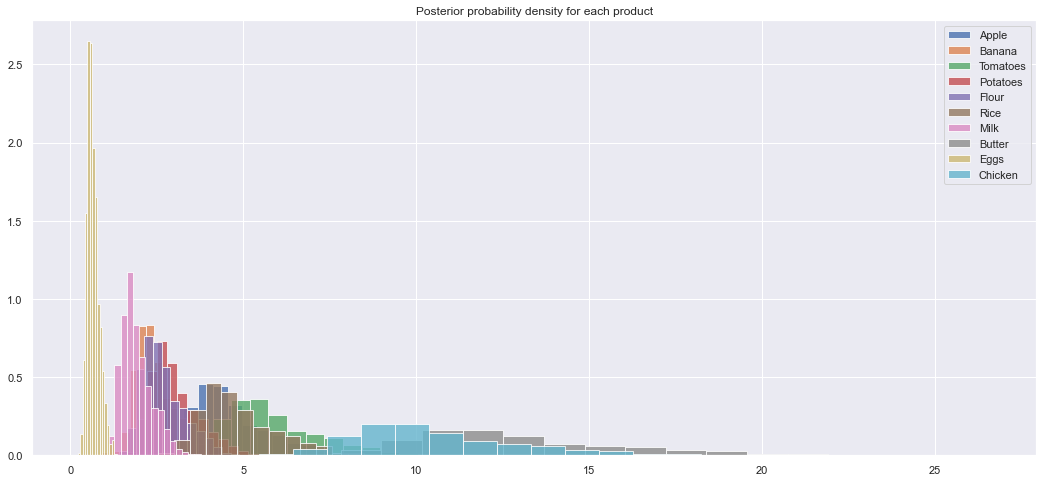

,Product,Mean,Posterior 95% confidence interval,Standard Error
0,Apple,4.59,"[3.098209951700255, 7.006982630611358]",1.04
1,Banana,2.46,"[1.649897976054768, 3.7771509947798223]",0.57
2,Tomatoes,5.83,"[3.9602128265218375, 8.906856977490438]",1.32
3,Potatoes,3.01,"[2.0287133689676544, 4.592510565804695]",0.68
4,Flour,2.66,"[1.7853932123068694, 4.059528925476193]",0.61
5,Rice,4.84,"[3.2704410904150145, 7.376869323690707]",1.09
6,Milk,1.90,"[1.2635198574139583, 2.9060833223182527]",0.44
7,Butter,12.83,"[8.6919556859311, 19.498345717000497]",2.90
8,Eggs,0.65,"[0.3828693387979385, 1.055380937427887]",0.17
9,Chicken,10.59,"[7.175950317904692, 16.15636286713783]",2.39


In [17]:


#storing POSTERIOR SAMPLES 
post_outcome = results.extract()

#posterior probability density function for each product
p_dataframe = pd.DataFrame(columns=['Product','Mean','Posterior 95% confidence interval','Standard Error'])

#plotting the PDF
plt.figure(figsize = (18,8))
plt.title('Posterior probability density for each product')
for i in range(len(list_of_products)):
    plt.hist(post_outcome['base_price'][:,i],bins=18, density=True, alpha = 0.8, label = list_of_products[i+1])
    #stroring the data in the product_df dataframe
    p_dataframe.loc[i] = (list_of_products[i+1],
                      round(np.mean(post_outcome['base_price'][:,i]),2),
                      np.percentile(post_outcome['base_price'][:,i], [2.5, 97.5]),
                      round(np.std(post_outcome['base_price'][:,i], ddof=1),2))
plt.legend()
plt.show()

p_dataframe

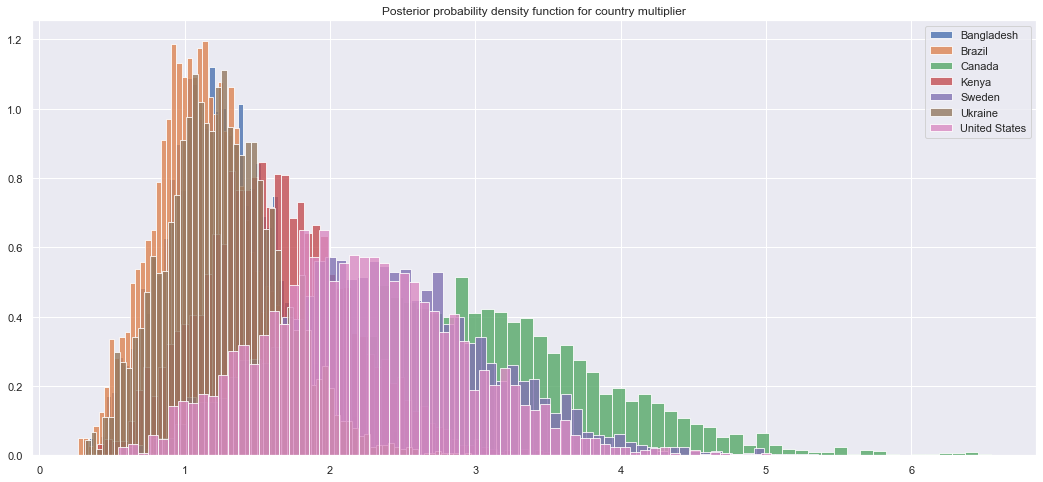

,Country,Mean,Posterior 95% confidence interval,Standard Error
0,Bangladesh,1.26,"[0.5462261176615048, 2.116947429571253]",0.40
1,Brazil,1.14,"[0.4966720456493802, 1.869350590251202]",0.35
2,Canada,2.92,"[1.2807437234353167, 4.819558391001892]",0.90
3,Kenya,1.64,"[0.7147719811519112, 2.704669935820272]",0.51
4,Sweden,2.37,"[1.0457484854921428, 3.91444140595064]",0.74
5,Ukraine,1.27,"[0.5524224890702105, 2.084054550541367]",0.39
6,United States,2.24,"[0.9817243865156615, 3.6651432108552378]",0.69


In [18]:
#Posterior probability density function for the multiplier each country
c_dataframe = pd.DataFrame(columns=['Country','Mean','Posterior 95% confidence interval','Standard Error'])

#plotting the porsterior probability density function
plt.figure(figsize = (18,8))
plt.title('Posterior probability density function for country multiplier')
for i in range(len(set(student_country))):
    plt.hist(post_outcome['country_multiplier'][:,i],bins=65, density=True, alpha = 0.8, label = country_list[i+1]) 
    #stroring the data in the country_df dataframe
    c_dataframe.loc[i] = (country_list[i+1],
                       round(np.mean(post_outcome['country_multiplier'][:,i]),2),
                       np.percentile(post_outcome['country_multiplier'][:,i], [2.5, 97.5]),
                       round(np.std(post_outcome['country_multiplier'][:,i], ddof=1),2))
plt.legend()
plt.show()
c_dataframe

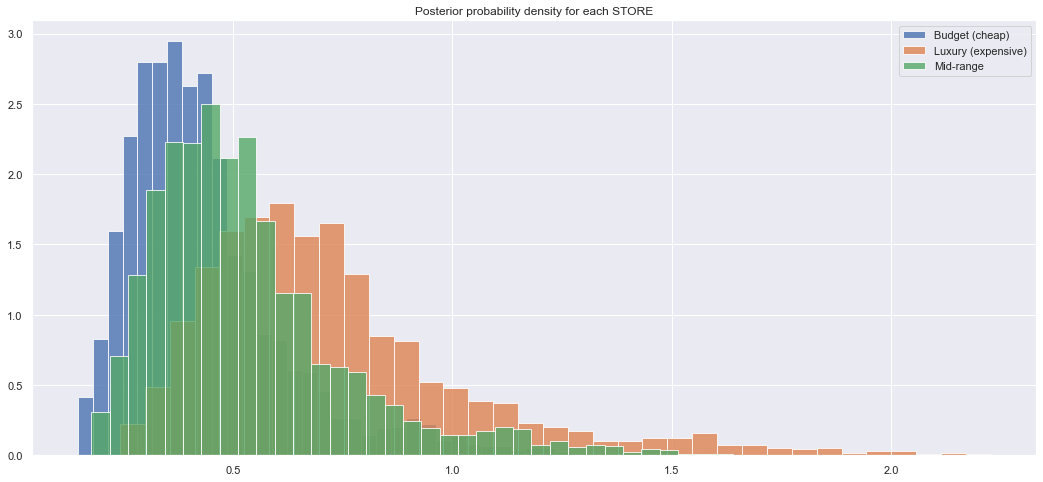

,Brand Perception,Mean,Posterior 95% confidence interval,Standard Error
0,Budget (cheap),0.44,"[0.19270135855060955, 0.9474313008187336]",0.18
1,Luxury (expensive),0.73,"[0.3211283756807126, 1.5783847792521304]",0.31
2,Mid-range,0.53,"[0.23503573758866717, 1.1517076473379269]",0.23


In [19]:
#posterior probability density function for 
#store_multiplier

store_dataframe = pd.DataFrame(columns=['Brand Perception',
                                      'Mean','Posterior 95% confidence interval','Standard Error'])
#plotting the porsterior probability density function

plt.figure(figsize = (18,8))
plt.title('Posterior probability density for each STORE')

for i in range(len(set(type_of_brand))):
    plt.hist(post_outcome['store_multiplier'][:,i],bins=35, density=True, alpha = 0.8, label = type_list[i+1])
        #stroring the data in the product_df dataframe
    store_dataframe.loc[i] = (type_list[i+1],
                      round(np.mean(post_outcome['store_multiplier'][:,i]),2),
                      np.percentile(post_outcome['store_multiplier'][:,i], [2.5, 97.5]),
                      round(np.std(post_outcome['store_multiplier'][:,i], ddof=1),2))
plt.legend()
plt.show()
store_dataframe

In [20]:
c_dataframe[['Country','Mean']]

# Collecting the rental values for unifying them for US Dollar Values
Canada = [1450,1550]
United_States = [2800,3500,4000,1795,2595,2923,3700,2850,1900,1900,2705,2996,3360,4000,4000,2595,1695,1330,1330,2880,1934,2923,2663,3500,2983,4200,2891,2595,3000,3200,2200,2695,5997,2750,2595,1000,1000]
Sweden = [6887, 6887]
Ukraine = [110852, 100000, 27713, 41570]
Kenya = [50000]
Brazil = [800,800,800,800]
Bangladesh = [4000,3000]


# multiplying by country currency values
Rent_of_Stores = [np.mean(Bangladesh)*0.012, 
                     np.mean(Brazil)*0.18, 
                     np.mean(Canada)*0.80, 
                     np.mean(Kenya)*0.0091, 
                     np.mean(Sweden)*0.12, 
                     np.mean(Ukraine)*0.036, 
                     np.mean(United_States)]

#storing the values in a table
table_values = c_dataframe[['Country','Mean']]
table_values['Average Price of Rental Value'] = np.round(Rent_of_Stores,2)
table_values

<ipython-input-20-3f53c82ccdfa>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table_values['Average Price of Rental Value'] = np.round(Rent_of_Stores,2)


,Country,Mean,Average Price of Rental Value
0,Bangladesh,1.26,42.00
1,Brazil,1.14,144.00
2,Canada,2.92,1200.00
3,Kenya,1.64,455.00
4,Sweden,2.37,826.44
5,Ukraine,1.27,2521.21
6,United States,2.24,2783.24


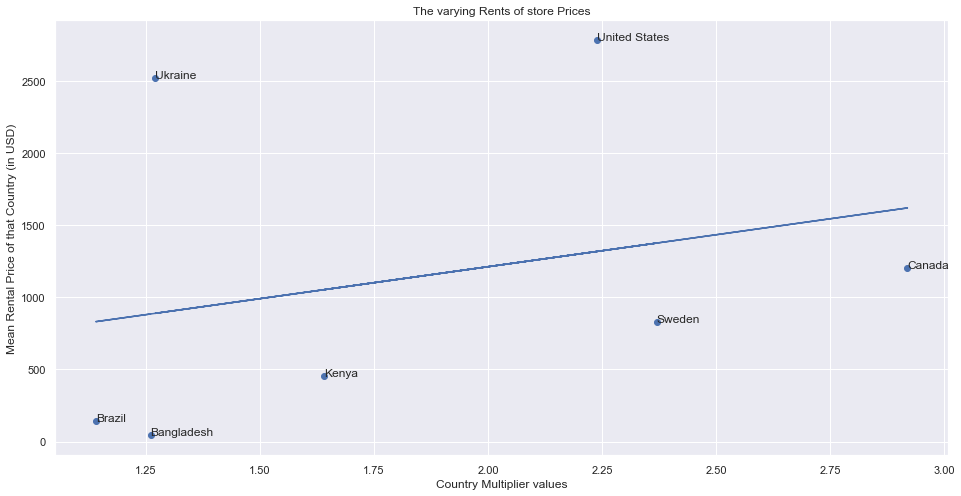

In [21]:
horizontal = table_values['Mean']
vertical = table_values['Average Price of Rental Value']
# storing the values in the two axes

plt.figure(figsize=(16,8))
plt.scatter(horizontal, vertical)
# plotting the figure

name_of_country = [one for alll,one in country_list.items()]
third_ax = np.polyfit(horizontal, vertical, 1)
scatter = np.poly1d(third_ax)

#labelling the axes
plt.xlabel("Country Multiplier values")
plt.ylabel("Mean Rental Price of that Country (in USD)")
plt.title("The varying Rents of store Prices")
plt.plot(horizontal,scatter(horizontal))
# visualizing by country
for one, alll in enumerate(name_of_country):
    plt.annotate(alll, (horizontal[one], vertical[one]))

plt.show()

In [23]:
print('Correlation Coef:',horizontal.corr(vertical))

Correlation Coef: 0.27283584647935183
